In [32]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import os 
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from vehicle_tracking import *
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [2]:
%matplotlib inline

In [3]:
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.model_selection import train_test_split


In [4]:
cars = glob.glob('vehicles/**/*.png')
notcars = glob.glob('non-vehicles/**/*.png')

# HOG feature 

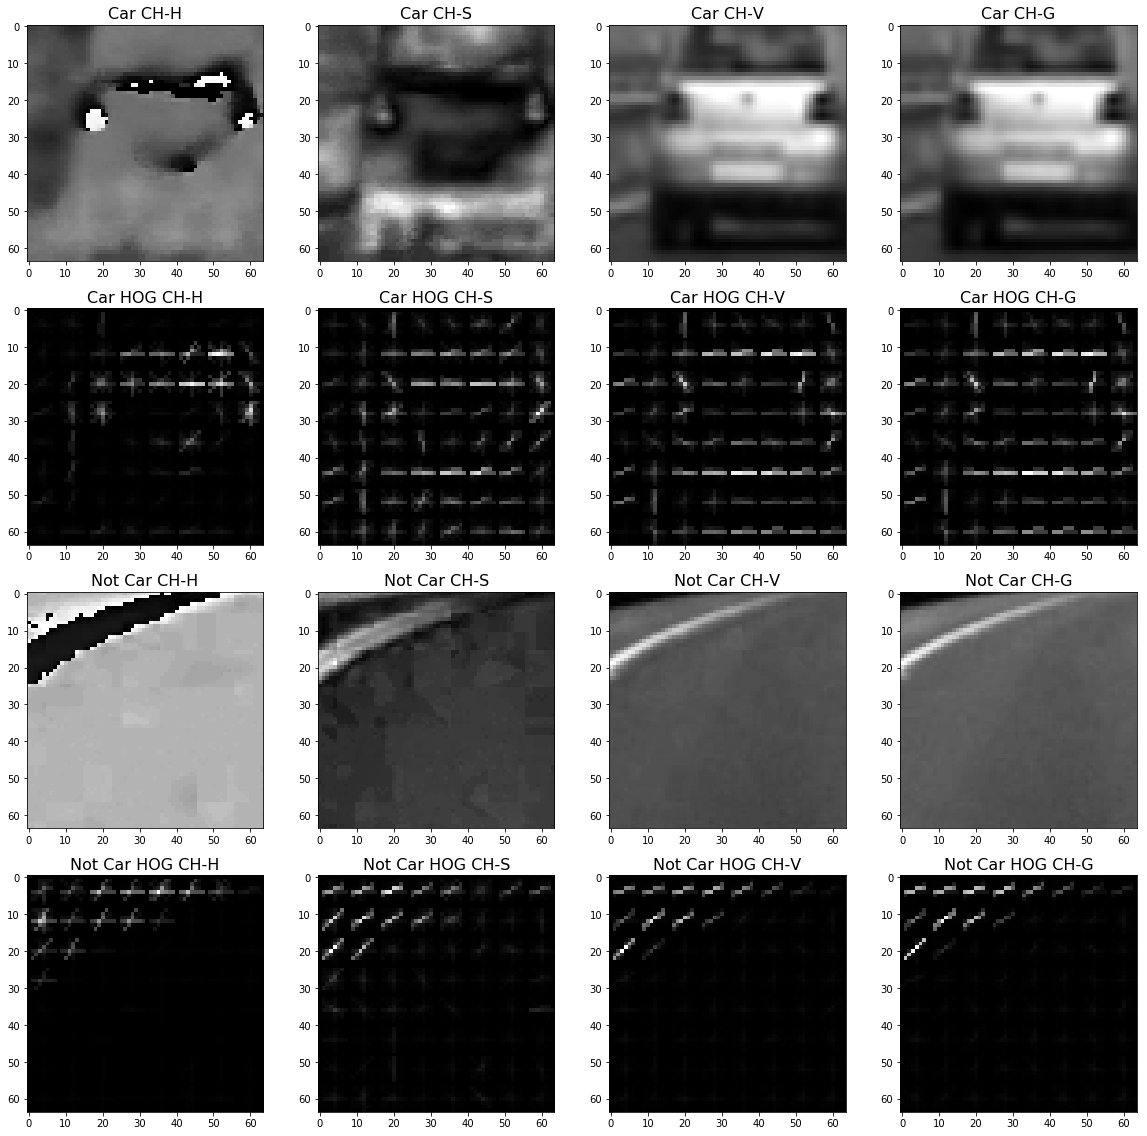

In [45]:
plt.figure(figsize=(20,20))
car_img = mpimg.imread(cars[100])
car_img_HSV = cv2.cvtColor(car_img, cv2.COLOR_RGB2HSV)
car_features = extract_feature_vis(car_img)

plt.subplot(4,4,1)
plt.imshow(car_img_HSV[:,:,0],cmap='gray')
plt.title('Car CH-H', fontsize=16)
plt.subplot(4,4,2)
plt.imshow(car_img_HSV[:,:,1],cmap='gray')
plt.title('Car CH-S', fontsize=16)
plt.subplot(4,4,3)
plt.imshow(car_img_HSV[:,:,2],cmap='gray')
plt.title('Car CH-V', fontsize=16)
plt.subplot(4,4,4)
plt.imshow(cv2.cvtColor(car_img, cv2.COLOR_RGB2GRAY),cmap='gray')
plt.title('Car CH-G', fontsize=16)

plt.subplot(4,4,5)
plt.imshow(car_features[0][1],cmap='gray')
plt.title('Car HOG CH-H', fontsize=16)
plt.subplot(4,4,6)
plt.imshow(car_features[1][1],cmap='gray')
plt.title('Car HOG CH-S', fontsize=16)
plt.subplot(4,4,7)
plt.imshow(car_features[2][1],cmap='gray')
plt.title('Car HOG CH-V', fontsize=16)
plt.subplot(4,4,8)
plt.imshow(car_features[3][1],cmap='gray')
plt.title('Car HOG CH-G', fontsize=16)

notcar_img = mpimg.imread(notcars[100])
notcar_img_HSV = cv2.cvtColor(notcar_img, cv2.COLOR_RGB2HSV)
notcar_features = extract_feature_vis(notcar_img)
plt.subplot(4,4,9)
plt.imshow(notcar_img_HSV[:,:,0],cmap='gray')
plt.title('Not Car CH-H', fontsize=16)
plt.subplot(4,4,10)
plt.imshow(notcar_img_HSV[:,:,1],cmap='gray')
plt.title('Not Car CH-S', fontsize=16)
plt.subplot(4,4,11)
plt.imshow(notcar_img_HSV[:,:,2],cmap='gray')
plt.title('Not Car CH-V', fontsize=16)
plt.subplot(4,4,12)
plt.imshow(cv2.cvtColor(notcar_img, cv2.COLOR_RGB2GRAY),cmap='gray')
plt.title('Not Car CH-G', fontsize=16)

plt.subplot(4,4,13)
plt.imshow(notcar_features[0][1],cmap='gray')
plt.title('Not Car HOG CH-H', fontsize=16)
plt.subplot(4,4,14)
plt.imshow(notcar_features[1][1],cmap='gray')
plt.title('Not Car HOG CH-S', fontsize=16)
plt.subplot(4,4,15)
plt.imshow(notcar_features[2][1],cmap='gray')
plt.title('Not Car HOG CH-V', fontsize=16)
plt.subplot(4,4,16)
plt.imshow(notcar_features[3][1],cmap='gray')
plt.title('Not Car HOG CH-G', fontsize=16)


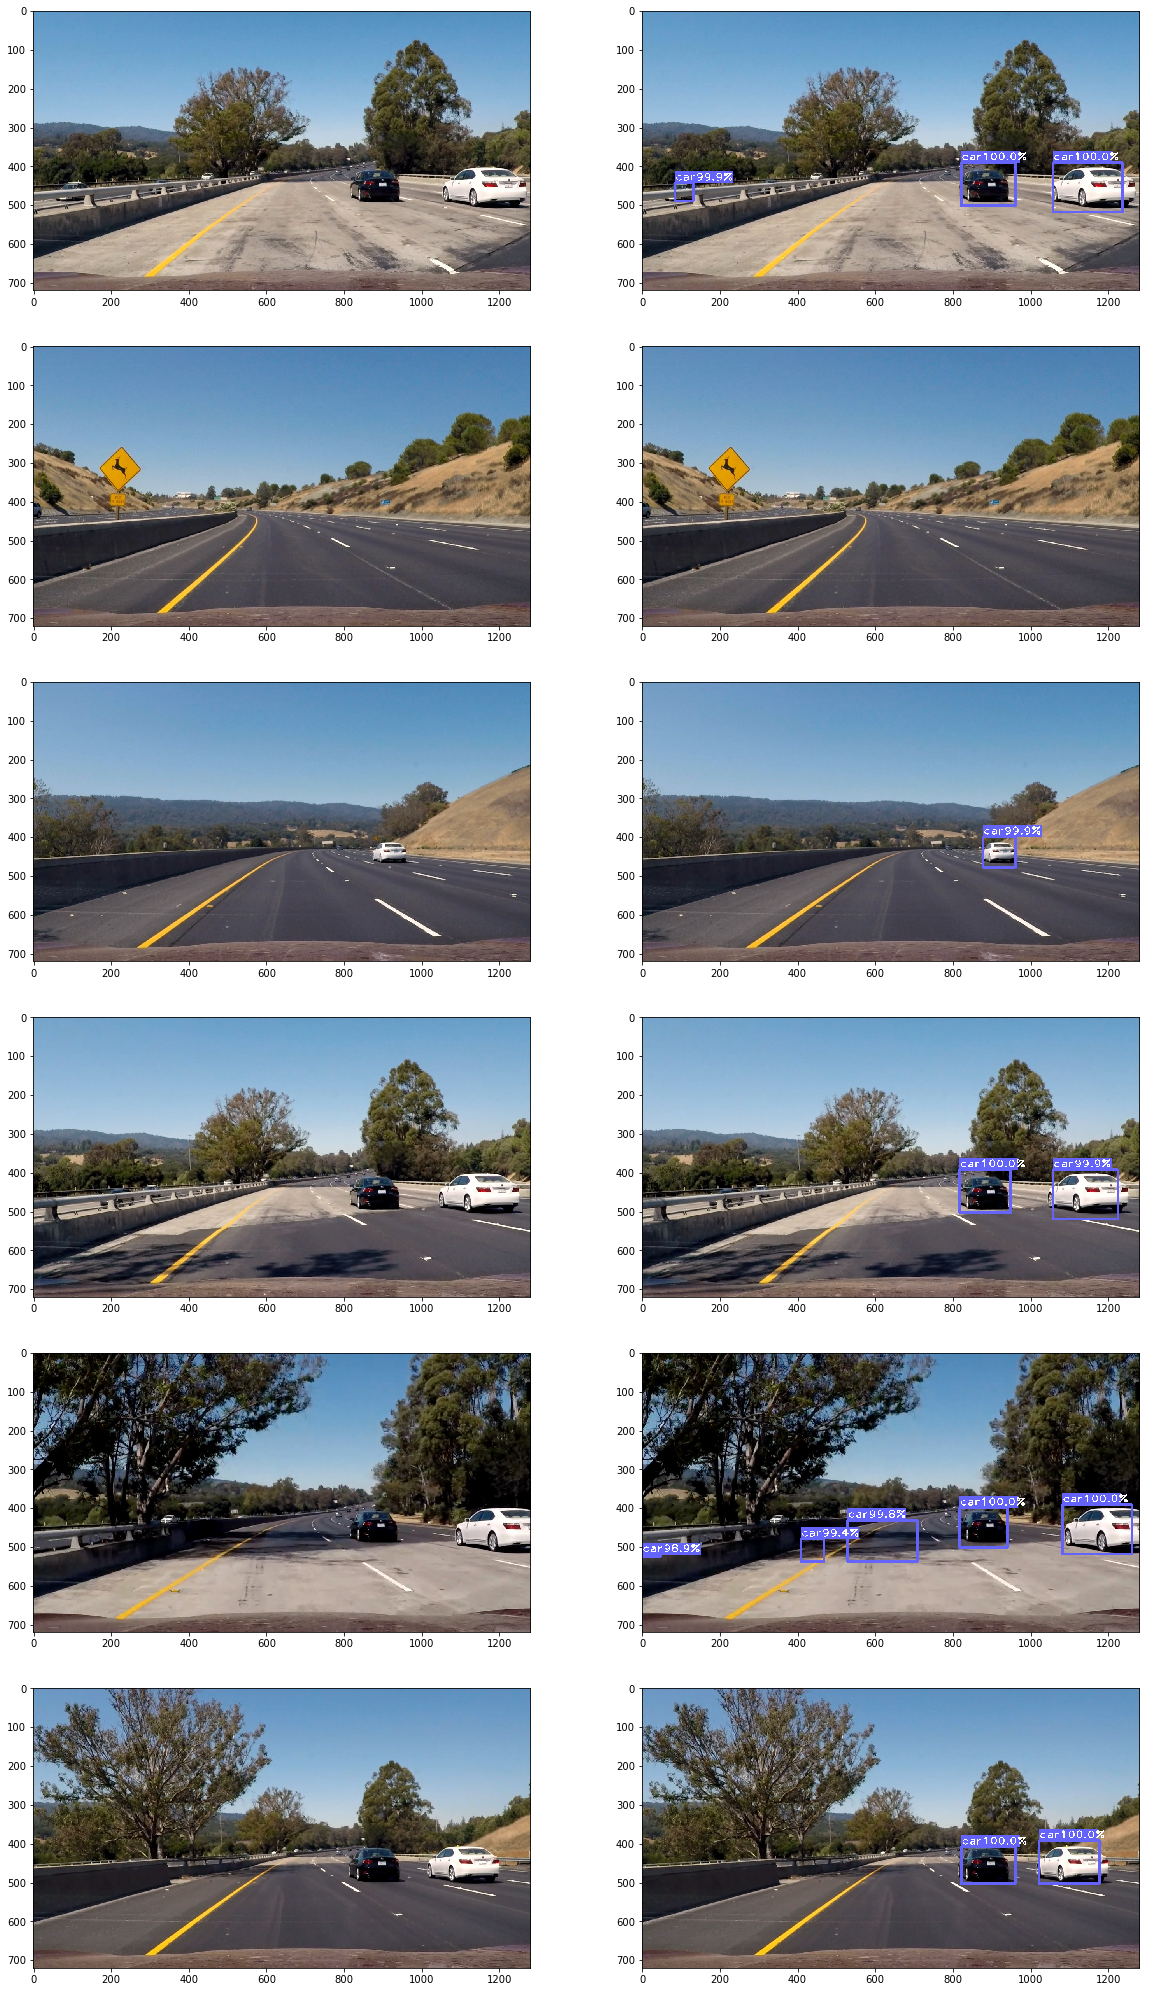

In [51]:
scales = [0.75, 1.0, 1.25, 1.5, 2.0]
images = glob.glob('test_images/*.jpg')
n_images = len(images)
plt.figure(figsize=(20,6*n_images))
img_ct = 0
for fname in images:
    img = mpimg.imread(fname)
    plt.subplot(n_images,2,img_ct*2+1)
    plt.imshow(img)
    hmap, pmap = car_search_multi_scale(img, 360, 720, scales, clf, X_scaler)
    img_labeled = car_labeling_single_img(img, 360, 720, scales, clf, X_scaler)
    plt.subplot(n_images,2,img_ct*2+2)
    plt.imshow(img_labeled)
    img_ct += 1

In [52]:
from moviepy.editor import VideoFileClip, ImageSequenceClip
from tqdm import tqdm

In [55]:
clip = VideoFileClip('output_images/video_output.mp4')
clip = [frame for frame in clip.iter_frames()]

In [58]:
gif_clip = ImageSequenceClip(clip[::4], fps=25).resize(0.3)

In [59]:

gif_clip.write_gif('test.gif')


[MoviePy] Building file test.gif with imageio


100%|██████████| 315/315 [00:28<00:00, 11.93it/s]
